In [70]:
import numpy as np
import pandas as pd
import pytz

In [2]:
trader_data_path = "historical_data.csv"
sentiment_data_path = "fear_greed_index.csv"

In [3]:
trader_df = pd.read_csv(trader_data_path)
sentiment_df = pd.read_csv(sentiment_data_path)

In [16]:
trader_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [7]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [8]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [15]:
trader_df.isnull().sum()


Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [14]:
sentiment_df.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [19]:
order_counts = trader_df['Order ID'].value_counts().reset_index()
order_counts.columns = ['Order ID', 'num_executions']

In [21]:
order_counts

,Order ID,num_executions
0,61636246980,390
1,78766167752,372
2,76557824768,366
3,86618342363,354
4,88683244072,298
...,...,...
50550,61591034454,1
50551,61591005843,1
50552,61590964604,1
50553,61590922939,1


In [25]:
multi_exec_orders = order_counts[order_counts['num_executions'] > 1]
multi_exec_orders

,Order ID,num_executions
0,61636246980,390
1,78766167752,372
2,76557824768,366
3,86618342363,354
4,88683244072,298
...,...,...
21171,84702713498,2
21172,83492593565,2
21173,88434032375,2
21174,85772246596,2


In [23]:
trader_df = trader_df.merge(order_counts, on='Order ID', how='left')


In [40]:
trader_df.head(100)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,num_executions,slippage,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,11,0.0231,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,11,0.0231,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,11,0.0231,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,11,0.0231,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.000000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,11,0.0231,2024-10-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,9.0642,82.02,743.45,SELL,03-12-2024 15:22,4189.888602,Sell,101.447367,0x125ea070e5b6af24d28e04184f784a02018f001d1acb...,52209955900,True,0.260205,3.910000e+14,1.730000e+12,38,-0.0366,2024-10-27
96,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,9.0642,97.70,885.57,SELL,03-12-2024 15:22,4107.868602,Sell,120.841353,0x125ea070e5b6af24d28e04184f784a02018f001d1acb...,52209955900,True,0.309950,5.680000e+14,1.730000e+12,38,-0.0366,2024-10-27
97,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,9.0613,98.00,888.01,SELL,03-12-2024 15:22,4010.168602,Sell,120.928211,0x125ea070e5b6af24d28e04184f784a02018f001d1acb...,52209955900,True,0.310802,1.860000e+13,1.730000e+12,38,-0.0366,2024-10-27
98,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,9.0611,82.02,743.19,SELL,03-12-2024 15:22,3912.168602,Sell,101.193105,0x125ea070e5b6af24d28e04184f784a02018f001d1acb...,52209955900,True,0.260116,8.570000e+14,1.730000e+12,38,-0.0366,2024-10-27


In [26]:
trader_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
 16  num_executions    21

conclusion 1: Many trades are split into multiple executions, indicating large orders or low liquidity

In [27]:
df_sorted = trader_df.sort_values(by=['Order ID', 'Timestamp'])

In [29]:
df_sorted.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,num_executions
83769,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0967,183.53,BUY,01-05-2023 01:06,0.0000,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,1.680000e+12,3
83770,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0824,156.39,BUY,01-05-2023 01:06,0.0967,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,1.680000e+12,3
83771,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1898.6,0.0722,137.08,BUY,01-05-2023 01:06,0.1791,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,1.680000e+12,3
39055,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.4933,1100.11,BUY,05-12-2023 03:11,0.0000,Open Long,0.0,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4064960965,True,0.275027,6.320000e+14,1.700000e+12,7
39056,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.8681,1935.95,BUY,05-12-2023 03:11,0.4933,Open Long,0.0,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4064960965,True,0.483987,2.340000e+14,1.700000e+12,7


In [30]:
slippage_df = df_sorted.groupby('Order ID')['Execution Price'].agg(['first', 'last'])

In [32]:
slippage_df

,first,last
Order ID,,
173271100,1897.9000,1898.6000
4064960965,2230.1000,2231.0000
4064974623,41867.0000,41866.0000
4626056690,42748.0000,42749.0000
4626057386,2252.3000,2252.3000
...,...,...
90142447552,1.6301,1.6301
90149164333,95098.0000,95093.0000
90149213920,95094.0000,95094.0000


In [33]:
slippage_df['slippage'] = slippage_df['last'] - slippage_df['first']

In [34]:
slippage_df

,first,last,slippage
Order ID,,,
173271100,1897.9000,1898.6000,0.7
4064960965,2230.1000,2231.0000,0.9
4064974623,41867.0000,41866.0000,-1.0
4626056690,42748.0000,42749.0000,1.0
4626057386,2252.3000,2252.3000,0.0
...,...,...,...
90142447552,1.6301,1.6301,0.0
90149164333,95098.0000,95093.0000,-5.0
90149213920,95094.0000,95094.0000,0.0


In [36]:
trader_df = trader_df.merge(slippage_df['slippage'], on='Order ID', how='left')

In [37]:
trader_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,num_executions,slippage
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,11,0.0231
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,11,0.0231
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,11,0.0231
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,11,0.0231
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,11,0.0231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12,22,0.0000
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12,22,0.0000
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12,22,0.0000
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12,22,0.0000


conclusion 2: Trades with multiple executions often experience greater price slippage.

In [38]:
trader_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
 16  num_executions    21

In [51]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['timestamp'], unit='s').dt.date
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], dayfirst=True)

# Extract date
trader_df['date'] = trader_df['Timestamp IST'].dt.date

In [52]:
merged_df = pd.merge(trader_df, sentiment_df[['date', 'classification']], on='date', how='left')


In [53]:
order_execs = merged_df.groupby('Order ID').agg({
    'num_executions': 'max',
    'classification': 'first'  # assuming same sentiment during the order
}).reset_index()

In [54]:
avg_execs_by_sentiment = order_execs.groupby('classification')['num_executions'].mean().reset_index()


In [55]:
print(avg_execs_by_sentiment)


  classification  num_executions
0   Extreme Fear        7.435024
1  Extreme Greed        2.546062
2           Fear        6.888072
3          Greed        3.331611
4        Neutral        4.775890


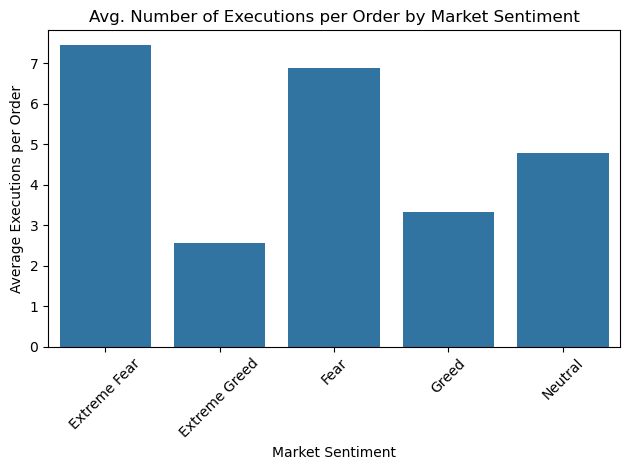

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=avg_execs_by_sentiment, x='classification', y='num_executions')
plt.xticks(rotation=45)
plt.title('Avg. Number of Executions per Order by Market Sentiment')
plt.ylabel('Average Executions per Order')
plt.xlabel('Market Sentiment')
plt.tight_layout()
plt.show()

Conclusion 3: During high volatility (e.g., Extreme Fear), more trades are split across multiple transactions.

In [59]:
trader_df['timestamp_dt'] = pd.to_datetime(trader_df['Timestamp'], unit='ms')

In [60]:
trader_df = trader_df.sort_values(by=['Transaction Hash', 'timestamp_dt'])


In [61]:
trader_df['time_diff_ms'] = trader_df.groupby('Transaction Hash')['timestamp_dt'].diff().dt.total_seconds() * 1000


In [62]:
trader_df['time_diff_ms'] = trader_df['time_diff_ms'].fillna(0)


In [63]:
ultrafast_trades = trader_df[trader_df['time_diff_ms'] < 10]


In [64]:
suspicious_accounts = ultrafast_trades['Account'].value_counts().reset_index()
suspicious_accounts.columns = ['Account', 'Ultrafast_Trade_Count']

In [65]:
bot_like_accounts = suspicious_accounts[suspicious_accounts['Ultrafast_Trade_Count'] > 50]

In [66]:
print(bot_like_accounts.head(10))


                                      Account  Ultrafast_Trade_Count
0  0xbee1707d6b44d4d52bfe19e41f8a828645437aab                  40183
1  0xbaaaf6571ab7d571043ff1e313a9609a10637864                  21192
2  0xa0feb3725a9335f49874d7cd8eaad6be45b27416                  15605
3  0x8477e447846c758f5a675856001ea72298fd9cb5                  14997
4  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23                  14733
5  0x28736f43f1e871e6aa8b1148d38d4994275d72c4                  13310
6  0x513b8629fe877bb581bf244e326a047b249c4ff1                  12236
7  0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4                   9893
8  0x47add9a56df66b524d5e2c1993a43cde53b6ed85                   8519
9  0x4f93fead39b70a1824f981a54d4e55b278e9f760                   7584


In [78]:
bot_accounts = set(bot_like_accounts['Account'])

In [103]:
trader_df['bot_flag'] = trader_df['Account'].apply(lambda x: x in bot_accounts)


In [82]:
trader_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,num_executions,slippage,date,timestamp_dt,timestamp_converted,timestamp_ist_parsed,timestamp_mismatch,Timestamp_IST_dt,time_diff_ms,bot_flag
42393,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2307.300,17.65100,40726.15,BUY,2024-02-06 07:01:00,0.28470,Open Long,0.000000,...,6,0.0,2024-03-09,2024-03-09 21:30:00+05:30,2024-03-09 21:30,2024-02-06 07:01,True,2024-02-06 07:01:00,0.0,True
42404,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2306.200,18.13200,41816.02,BUY,2024-02-06 07:02:00,24.81530,Open Long,0.000000,...,6,0.0,2024-03-09,2024-03-09 21:30:00+05:30,2024-03-09 21:30,2024-02-06 07:02,True,2024-02-06 07:02:00,0.0,True
42624,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,42899.000,0.00553,237.23,BUY,2024-02-06 08:28:00,-0.67207,Close Short,0.017696,...,18,0.0,2024-03-09,2024-03-09 21:30:00+05:30,2024-03-09 21:30,2024-02-06 08:28,True,2024-02-06 08:28:00,0.0,True
42627,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,42899.000,0.00552,236.80,BUY,2024-02-06 08:28:00,-0.55711,Close Short,0.017664,...,18,0.0,2024-03-09,2024-03-09 21:30:00+05:30,2024-03-09 21:30,2024-02-06 08:28,True,2024-02-06 08:28:00,0.0,True
42631,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,42899.000,0.00553,237.23,BUY,2024-02-06 08:29:00,-0.43543,Close Short,0.017696,...,18,0.0,2024-03-09,2024-03-09 21:30:00+05:30,2024-03-09 21:30,2024-02-06 08:29,True,2024-02-06 08:29:00,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8447,0x513b8629fe877bb581bf244e326a047b249c4ff1,BTC,84900.000,7.16831,608589.52,BUY,2025-04-19 22:17:00,49.44786,Open Long,0.000000,...,228,0.0,2025-06-15,2025-06-15 20:36:40+05:30,2025-06-15 20:36,2025-04-19 22:17,True,2025-04-19 22:17:00,0.0,True
30057,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,ZETA,2.279,177.80000,405.21,SELL,2024-03-01 21:18:00,177.80000,Close Long,16.732758,...,23,0.0,2024-03-09,2024-03-09 21:30:00+05:30,2024-03-09 21:30,2024-03-01 21:18,True,2024-03-01 21:18:00,0.0,True
161931,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,@107,23.420,10.00000,234.20,BUY,2024-12-20 14:23:00,39796.16219,Buy,0.000000,...,19,0.0,2024-10-27,2024-10-27 09:03:20+05:30,2024-10-27 09:03,2024-12-20 14:23,True,2024-12-20 14:23:00,0.0,True
99052,0xa0feb3725a9335f49874d7cd8eaad6be45b27416,@151,1797.100,0.16590,298.14,SELL,2025-04-25 17:42:00,11.54672,Sell,8.877119,...,2,0.0,2025-06-15,2025-06-15 20:36:40+05:30,2025-06-15 20:36,2025-04-25 17:42,True,2025-04-25 17:42:00,0.0,True


conclusion 4: Many trades with same transaction_hash within milliseconds may indicate bot activity

In [83]:

IST = pytz.timezone('Asia/Kolkata')
trader_df['timestamp_dt'] = trader_df['timestamp_dt'].dt.tz_localize('UTC').dt.tz_convert(IST)
trader_df['date'] = trader_df['timestamp_dt'].dt.date

TypeError: Already tz-aware, use tz_convert to convert.

In [84]:
sentiment_df

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [85]:
sentiment_daily = sentiment_df[['date', 'classification']].drop_duplicates()

In [86]:
merged_df = pd.merge(trader_df, sentiment_daily, on='date', how='left')

In [87]:
activity_summary = merged_df.groupby(['classification', 'bot_flag'])['Order ID'].count().reset_index()
activity_summary.columns = ['Sentiment', 'Is Bot', 'Number of Trades']

In [88]:
print(activity_summary)


       Sentiment  Is Bot  Number of Trades
0  Extreme Greed    True              6962
1          Greed    True             36289
2        Neutral    True            141012


In [89]:
trader_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211224 entries, 42393 to 96595
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype                       
---  ------                --------------   -----                       
 0   Account               211224 non-null  object                      
 1   Coin                  211224 non-null  object                      
 2   Execution Price       211224 non-null  float64                     
 3   Size Tokens           211224 non-null  float64                     
 4   Size USD              211224 non-null  float64                     
 5   Side                  211224 non-null  object                      
 6   Timestamp IST         211224 non-null  datetime64[ns]              
 7   Start Position        211224 non-null  float64                     
 8   Direction             211224 non-null  object                      
 9   Closed PnL            211224 non-null  float64                     
 10  Transactio

In [92]:
trader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,num_executions,slippage,date,timestamp_dt,timestamp_converted,timestamp_ist_parsed,timestamp_mismatch,Timestamp_IST_dt,time_diff_ms,bot_flag
42393,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2307.3,17.65100,40726.15,BUY,2024-02-06 07:01:00,0.28470,Open Long,0.000000,...,6,0.0,2024-03-09,2024-03-09 21:30:00+05:30,2024-03-09 21:30,2024-02-06 07:01,True,2024-02-06 07:01:00,0.0,True
42404,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2306.2,18.13200,41816.02,BUY,2024-02-06 07:02:00,24.81530,Open Long,0.000000,...,6,0.0,2024-03-09,2024-03-09 21:30:00+05:30,2024-03-09 21:30,2024-02-06 07:02,True,2024-02-06 07:02:00,0.0,True
42624,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,42899.0,0.00553,237.23,BUY,2024-02-06 08:28:00,-0.67207,Close Short,0.017696,...,18,0.0,2024-03-09,2024-03-09 21:30:00+05:30,2024-03-09 21:30,2024-02-06 08:28,True,2024-02-06 08:28:00,0.0,True
42627,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,42899.0,0.00552,236.80,BUY,2024-02-06 08:28:00,-0.55711,Close Short,0.017664,...,18,0.0,2024-03-09,2024-03-09 21:30:00+05:30,2024-03-09 21:30,2024-02-06 08:28,True,2024-02-06 08:28:00,0.0,True
42631,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,42899.0,0.00553,237.23,BUY,2024-02-06 08:29:00,-0.43543,Close Short,0.017696,...,18,0.0,2024-03-09,2024-03-09 21:30:00+05:30,2024-03-09 21:30,2024-02-06 08:29,True,2024-02-06 08:29:00,0.0,True


In [95]:

order_performance = trader_df.groupby('Order ID').agg(
    total_pnl=('Closed PnL', 'sum'),
    avg_execution_price=('Execution Price', 'mean'),
    total_size_usd=('Size USD', 'sum'),
    avg_slippage=('slippage', 'mean')
).reset_index()

order_performance['is_split_order'] = trader_df['num_executions'] > 1

# Preview
print(order_performance.head())


     Order ID   total_pnl  avg_execution_price  total_size_usd  avg_slippage  \
0   173271100    0.000000          1898.133333          477.00           0.7   
1  4064960965    0.000000          2230.242857        25007.21           0.9   
2  4064974623    0.000000         41866.500000        24998.62          -1.0   
3  4626056690 -527.233130         42748.500000        25525.84           1.0   
4  4626057386  245.428491          2252.300000        25252.56           0.0   

   is_split_order  
0            True  
1            True  
2            True  
3            True  
4            True  


In [97]:
trader_df_merged = trader_df.merge(order_performance, on='Order ID', how='left')

In [99]:
# Group by is_split_order and compute average total PnL
pnl_comparison = trader_df_merged.groupby('is_split_order')['total_pnl'].mean().reset_index()

print("\n Average PnL: Split vs Single-Shot Orders")
print(pnl_comparison)



 Average PnL: Split vs Single-Shot Orders
   is_split_order    total_pnl
0           False  1038.498465
1            True  2823.534628


conclusion 5: Split orders (orders executed in multiple chunks) have a much higher average PnL than single-shot orders.

In [102]:

correlation = trader_df_merged[['num_executions', 'avg_slippage', 'total_pnl']].corr()

print("\n Correlation Matrix (Execution Count / Slippage vs PnL):")
print(correlation)



 Correlation Matrix (Execution Count / Slippage vs PnL):
                num_executions  avg_slippage  total_pnl
num_executions        1.000000      0.043206   0.369228
avg_slippage          0.043206      1.000000  -0.053551
total_pnl             0.369228     -0.053551   1.000000


### Correlation Insights Summary

- **num_executions vs total_pnl (0.369):**  
  More executions → higher total profit.  
  → Fragmented (split) orders are generally more profitable.

- **num_executions vs avg_slippage (0.043):**  
  More executions ≠ significantly more slippage.  
  → Splitting does not worsen price quality.

- **avg_slippage vs total_pnl (-0.054):**  
  Higher slippage → slightly lower profits.  
  → Slippage control remains important.
